In [45]:
# Mengimpor library OpenCV (cv2) untuk pengolahan citra dan NumPy (np) untuk operasi numerik.
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [46]:
# Menggunakan deep neural network dari cv2 untuk membaca weight dan config yolo
yolo = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

In [47]:
# Membuat daftar kosong untuk menyimpan nama-nama kelas objek
classes = []
with open("coco.names", "r") as file:
    classes = [line.strip() for line in file.readlines()]

layer_names = yolo.getLayerNames()
output_layers = [layer_names[i - 1] for i in yolo.getUnconnectedOutLayers()]

colorRed = (0, 0, 255)
colorGreen = (0, 255, 0)

In [48]:
# Memuat gambar
name = "class2.jpg"
img = cv2.imread(name)
if img is None:
    raise FileNotFoundError(f"Gambar dengan nama {name} tidak ditemukan.")
height, width, channels = img.shape

In [49]:
# Mendeteksi objek
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
yolo.setInput(blob)
outs = yolo.forward(output_layers)

In [50]:
# Mengukur waktu inferensi
start_time = time.time()
yolo.setInput(blob)
outs = yolo.forward(output_layers)
end_time = time.time()

# Waktu inferensi dalam detik
inference_time = end_time - start_time
print(f"Inference Time: {inference_time:.6f} seconds")

Inference Time: 0.380136 seconds


In [51]:
class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

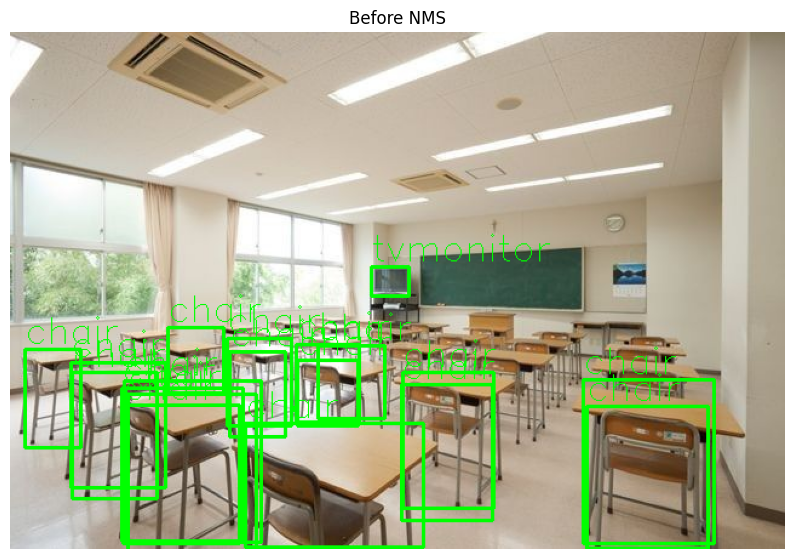

True

In [52]:
# Menampilkan gambar sebelum NMS
img_before_nms = img.copy()
for i in range(len(boxes)):
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    color = colorGreen
    cv2.rectangle(img_before_nms, (x, y), (x + w, y + h), color, 2)
    cv2.putText(img_before_nms, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 1)

# Konversi BGR ke RGB untuk matplotlib
img_before_nms_rgb = cv2.cvtColor(img_before_nms, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_before_nms_rgb)
plt.title("Before NMS")
plt.axis('off')
plt.show()

# Menyimpan hasil
cv2.imwrite("beforeNMS.jpg", img_before_nms)



19
11


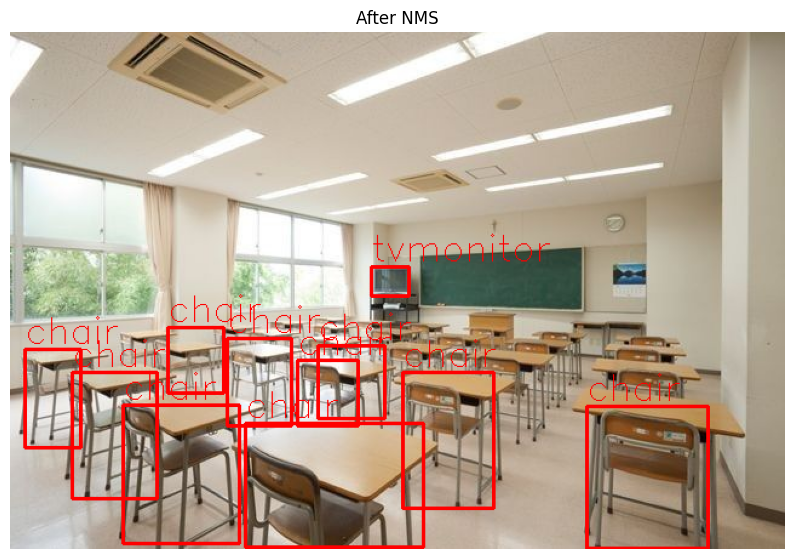

In [53]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
indexes = indexes.flatten()  # Flatten the indexes array

print(len(boxes))
print(len(indexes))

for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colorRed
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 1)

# Menampilkan gambar sesudah NMS
img_after_nms_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_after_nms_rgb)
plt.title("After NMS")
plt.axis('off')
plt.show()